title: "google_cyclistic_data_analysis"<br>author: "Kyar-Hsing Ma"<br>date: "July 16, 2022"


In [1]:
{include=FALSE}
knitr::opts_chunk$set(echo = TRUE, warning = FALSE)

# **Cyclistic Data Analysis**
This analysis is based on the Divvy case study "'Sophisticated, Clear, and Polished’: Divvy and Data Visualization" written by Kevin Hartman (found here: https://artscience.blog/home/divvy-dataviz-case-study)

## **Steps Used for Data Analysis**
1. [Ask](#ask)
2. [Prepare](#prepare)
3. [Process](#process)
4. [Analyze](#analyze)
5. [Share](#share)
6. [Act](#act)


## ***Ask*** 
### Company 

###### **Cyclistic** 
A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

### Stakeholders
● Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.  
● Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how I, as a junior data analyst, can help Cyclistic achieve them.  
● Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

### Question to Answer
**How do annual members and casual riders use Cyclistic bikes differently?**

## ***Prepare*** 
### Load the necessary libraries

In [2]:
{warning = FALSE}
library("tidyverse") #helps wrangle data
library("data.table") #helps in writing mode function
library("here") #helps access the working directory
library("janitor") #helps checking data
library("skimr") #helps inspecting data
library("lubridate") #helps wrangle data attribute
library("writexl") #writing data to excel 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Import Necessary Data
The data used for this analys is from 2021/06 to 2022/05 and can be access from the source:https://divvy-tripdata.s3.amazonaws.com/index.html

In [3]:
tripdata_202106 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202106-divvy-tripdata.csv")
tripdata_202107 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202107-divvy-tripdata.csv")
tripdata_202108 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202108-divvy-tripdata.csv")
tripdata_202109 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202109-divvy-tripdata.csv")
tripdata_202110 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202110-divvy-tripdata.csv")
tripdata_202111 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202111-divvy-tripdata.csv")
tripdata_202112 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202112-divvy-tripdata.csv")
tripdata_202201 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202201-divvy-tripdata.csv")
tripdata_202202 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202202-divvy-tripdata.csv")
tripdata_202203 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202203-divvy-tripdata.csv")
tripdata_202204 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202204-divvy-tripdata.csv")
tripdata_202205 <- read_csv("../input/google-cyclistic-data-analysis-case-study-1/202205-divvy-tripdata.csv")

Rows: 729595 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 822410 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 804352 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

### Compare columan names of each file
Column names of each data are displayed to check any inconsistency present in the data.

In [4]:
colnames(tripdata_202106)
colnames(tripdata_202107)
colnames(tripdata_202108)
colnames(tripdata_202109)
colnames(tripdata_202110)
colnames(tripdata_202111)
colnames(tripdata_202112)
colnames(tripdata_202201)
colnames(tripdata_202202)
colnames(tripdata_202203)
colnames(tripdata_202204)
colnames(tripdata_202205)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

The results are all the same. Therefore, the variable names are consistent across all data. 

### Inspect the dataframes and look for incongruencies

In [5]:
str(tripdata_202106)
str(tripdata_202107)
str(tripdata_202108)
str(tripdata_202109)
str(tripdata_202110)
str(tripdata_202111)
str(tripdata_202112)
str(tripdata_202201)
str(tripdata_202202)
str(tripdata_202203)
str(tripdata_202204)
str(tripdata_202205)

spec_tbl_df [729,595 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:729595] "99FEC93BA843FB20" "06048DCFC8520CAF" "9598066F68045DF2" "B03C0FE48C412214" ...
 $ rideable_type     : chr [1:729595] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:729595], format: "2021-06-13 14:31:28" "2021-06-04 11:18:02" ...
 $ ended_at          : POSIXct[1:729595], format: "2021-06-13 14:34:11" "2021-06-04 11:24:19" ...
 $ start_station_name: chr [1:729595] NA NA NA NA ...
 $ start_station_id  : chr [1:729595] NA NA NA NA ...
 $ end_station_name  : chr [1:729595] NA NA NA NA ...
 $ end_station_id    : chr [1:729595] NA NA NA NA ...
 $ start_lat         : num [1:729595] 41.8 41.8 41.8 41.8 41.8 ...
 $ start_lng         : num [1:729595] -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ end_lat           : num [1:729595] 41.8 41.8 41.8 41.8 41.8 ...
 $ end_lng           : num [1:729595] -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ member_casual   

The outputs show that all data type match.  

### Stack individual montly data into one big data frame for processing

In [6]:
all_trips <- bind_rows(tripdata_202106,tripdata_202107,tripdata_202108,tripdata_202109,tripdata_202110,tripdata_202111,tripdata_202112,tripdata_202201,tripdata_202202,tripdata_202203,tripdata_202204,tripdata_202205)

## ***Process*** 
### Inspect the new table that has been created

In [7]:
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame  
tail(all_trips) #See the last 6 rows of data frame
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numeric
skim_without_charts(all_trips) #skim through the data to give an overview insight of the data

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 5860776

[1] 5860776      13

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NA,NA,NA,NA,41.80,-87.59,41.80,-87.60,member
06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NA,NA,NA,NA,41.79,-87.59,41.80,-87.60,member
9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NA,NA,NA,NA,41.80,-87.60,41.79,-87.59,member
B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NA,NA,NA,NA,41.78,-87.58,41.80,-87.60,member
B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NA,NA,NA,NA,41.80,-87.59,41.79,-87.59,member
62B943CEAAA420BA,electric_bike,2021-06-03 19:32:01,2021-06-03 19:38:46,NA,NA,NA,NA,41.78,-87.58,41.78,-87.58,member


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
284843EC9F8C5663,classic_bike,2022-05-30 18:34:44,2022-05-31 19:34:35,Ashland Ave & Lake St,13073,NA,NA,41.88592,-87.66717,NA,NA,casual
8891BA0053ECEC4F,electric_bike,2022-05-27 22:00:02,2022-05-27 22:07:01,Clark St & Newport St,632,NA,NA,41.94456,-87.65483,41.92,-87.65,member
47D8B5FBCADECFC1,electric_bike,2022-05-15 16:05:39,2022-05-15 16:44:12,Clark St & Newport St,632,NA,NA,41.94448,-87.65476,41.92,-87.76,member
AA8D16CF38B40703,electric_bike,2022-05-21 10:10:13,2022-05-21 10:26:09,Francisco Ave & Bloomingdale Ave,429,NA,NA,41.91000,-87.70000,41.92,-87.66,casual
897EBFD44F329E0A,electric_bike,2022-05-12 07:53:58,2022-05-12 08:01:18,Francisco Ave & Bloomingdale Ave,429,NA,NA,41.91000,-87.70000,41.90,-87.69,member
AAC23AB89E8A7733,electric_bike,2022-05-11 21:14:28,2022-05-11 21:18:16,Clark St & Newport St,632,NA,NA,41.94457,-87.65480,41.94,-87.65,member


spec_tbl_df [5,860,776 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5860776] "99FEC93BA843FB20" "06048DCFC8520CAF" "9598066F68045DF2" "B03C0FE48C412214" ...
 $ rideable_type     : chr [1:5860776] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5860776], format: "2021-06-13 14:31:28" "2021-06-04 11:18:02" ...
 $ ended_at          : POSIXct[1:5860776], format: "2021-06-13 14:34:11" "2021-06-04 11:24:19" ...
 $ start_station_name: chr [1:5860776] NA NA NA NA ...
 $ start_station_id  : chr [1:5860776] NA NA NA NA ...
 $ end_station_name  : chr [1:5860776] NA NA NA NA ...
 $ end_station_id    : chr [1:5860776] NA NA NA NA ...
 $ start_lat         : num [1:5860776] 41.8 41.8 41.8 41.8 41.8 ...
 $ start_lng         : num [1:5860776] -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ end_lat           : num [1:5860776] 41.8 41.8 41.8 41.8 41.8 ...
 $ end_lng           : num [1:5860776] -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ me

   ride_id          rideable_type        started_at                 
 Length:5860776     Length:5860776     Min.   :2021-06-01 00:00:38  
 Class :character   Class :character   1st Qu.:2021-07-29 10:43:32  
 Mode  :character   Mode  :character   Median :2021-09-23 17:33:23  
                                       Mean   :2021-10-26 03:44:54  
                                       3rd Qu.:2022-01-14 10:59:12  
                                       Max.   :2022-05-31 23:59:56  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-06-01 00:06:22   Length:5860776     Length:5860776    
 1st Qu.:2021-07-29 11:02:56   Class :character   Class :character  
 Median :2021-09-23 17:49:29   Mode  :character   Mode  :character  
 Mean   :2021-10-26 04:05:36                                        
 3rd Qu.:2022-01-14 11:14:48                                        
 Max.   :2022-06-02 11:35:01      

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,ride_id,0,1.0000000,16,16,0,5860776,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1.0000000,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,start_station_name,823167,0.8595464,3,53,0,1105,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,start_station_id,823164,0.8595469,3,44,0,1063,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,end_station_name,878338,0.8501328,9,53,0,1112,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,end_station_id,878338,0.8501328,3,44,0,1068,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,member_casual,0,1.0000000,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,numeric,start_lat,0,1.0000000,NA,NA,NA,NA,NA,41.90036,0.04704035,41.64,41.88103,41.89889,41.92914,45.63503,NA,NA,NA,NA
9,numeric,start_lng,0,1.0000000,NA,NA,NA,NA,NA,-87.64681,0.03049014,-87.84,-87.66120,-87.64299,-87.62783,-73.79648,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values   
Name                       all_trips
Number of rows             5860776  
Number of columns          13       
_______________________             
Column type frequency:              
  character                7        
  numeric                  4        
  POSIXct                  2        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1      16  16     0  5860776          0
2 rideable_type              0         1      11  13     0        3          0
3 start_station_name    823167         0.860   3  53     0     1105          0
4 start_station_id      823164         0.860   3  44     0     1063          0
5 end_station_name      878338         0.850   9  53     0     1112        

By inspecting the tables from above, a reasonable insight of the data frame is obtained and nearly 900,000 entries are missing from station\_id. This missing data would impose a bias in data analysis. In the real world case,  the data team of cyclistic company should be inquired  for explanation or how to manage the missing data. However, the general purpose of this case scenario is to find the trends of casual and member riders of the company. Therefore, the missing data will be removed here and assume that the remaining data is big enough for analysis.  

### Remove the missing data

In [8]:
all_trips <- na.omit(all_trips)


### Add more columns for data aggregation

This will allow us to aggregate ride data for each month, day, or year ... before completing these operations we could only aggregate at the ride level
source: https://www.statmethods.net/input/dates.html

In [9]:
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

### Add a "ride_length" calculation to all_trips (in seconds)  

source: https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html

In [10]:
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)


### Adding time_period column to determine which period

source:https://stackoverflow.com/questions/50304159/label-day-timing-into-morning-afternoon-and-evening-in-r

In [11]:
breaks <- hour(hm("00:00", "6:00", "12:00", "18:00", "23:59")) #Create breaks
labels <- c("Night", "Morning", "Afternoon", "Evening") # Labels for the breaks
all_trips$time_period <- cut(x=hour(all_trips$started_at), 
                         breaks = breaks, labels = labels, include.lowest=TRUE)

### Inspect the structure of the columns

In [12]:
str(all_trips)


tibble [4,667,299 × 20] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4667299] "0D904FEC5F84A538" "C4185F300D6B552B" "60F97090AC85F55E" "FBC7B1F0160AA304" ...
 $ rideable_type     : chr [1:4667299] "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4667299], format: "2021-06-04 07:29:18" "2021-06-23 08:39:36" ...
 $ ended_at          : POSIXct[1:4667299], format: "2021-06-04 07:45:34" "2021-06-23 08:41:37" ...
 $ start_station_name: chr [1:4667299] "Orleans St & Elm St" "Desplaines St & Kinzie St" "Clark St & Grace St" "Kingsbury St & Kinzie St" ...
 $ start_station_id  : chr [1:4667299] "TA1306000006" "TA1306000003" "TA1307000127" "KA1503000043" ...
 $ end_station_name  : chr [1:4667299] "Orleans St & Elm St" "Kingsbury St & Kinzie St" "Clark St & Leland Ave" "Desplaines St & Kinzie St" ...
 $ end_station_id    : chr [1:4667299] "TA1306000006" "KA1503000043" "TA1309000014" "TA1306000003" ...
 $ start_lat         : num [1:466729

### Convert "ride_length" from Factor to numeric so we can run calculations on the data


In [13]:
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

### Remove "bad" data


In [14]:
all_trips %>% summarise(min(ride_length))


min(ride_length)
<dbl>
-3354


The minimum of ride length is a negative. The data frame includes a few entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative.\
We will create a new version called the clean_data since data is being removed.\
source: https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/

In [15]:
clean_data <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

## <div id = "analyze"> ***Analyze*** 

### Descriptive analysis on ride_length (all figures in seconds)

In [16]:
mean(clean_data$ride_length) #straight average (total ride length / rides)
median(clean_data$ride_length) #midpoint number in the ascending array of ride lengths
max(clean_data$ride_length) #longest ride
min(clean_data$ride_length) #shortest ride

[1] 1212.894

[1] 696

[1] 3356649

[1] 0

### Compare members and casual users


In [17]:
aggregate(clean_data$ride_length ~ clean_data$member_casual, FUN = mean)
aggregate(clean_data$ride_length ~ clean_data$member_casual, FUN = median)
aggregate(clean_data$ride_length ~ clean_data$member_casual, FUN = max)
aggregate(clean_data$ride_length ~ clean_data$member_casual, FUN = min)

clean_data$member_casual,clean_data$ride_length
<chr>,<dbl>
casual,1806.0819
member,760.5681


clean_data$member_casual,clean_data$ride_length
<chr>,<dbl>
casual,958
member,556


clean_data$member_casual,clean_data$ride_length
<chr>,<dbl>
casual,3356649
member,89738


clean_data$member_casual,clean_data$ride_length
<chr>,<dbl>
casual,0
member,0


### See the average ride time by each day for members vs casual users


In [18]:
aggregate(clean_data$ride_length ~ clean_data$member_casual + clean_data$day_of_week, FUN = mean)

clean_data$member_casual,clean_data$day_of_week,clean_data$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1702.6996
member,Friday,741.9006
casual,Monday,1806.2886
member,Monday,736.5971
casual,Saturday,1967.9969
member,Saturday,856.5753
casual,Sunday,2053.6915
member,Sunday,867.0642
casual,Thursday,1628.6583


### Fix the days of the week being out of order.


In [19]:
clean_data$day_of_week <- ordered(clean_data$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

### Analyze ridership data by type and weekday


In [20]:
clean_data %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,384620,2053.6915
casual,Mon,234503,1806.2886
casual,Tue,218154,1569.9493
casual,Wed,217437,1597.2237
casual,Thu,236564,1628.6583
casual,Fri,279855,1702.6996
casual,Sat,448055,1967.9969
member,Sun,314111,867.0642
member,Mon,375444,736.5971


### Visualize the number of rides by rider type


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


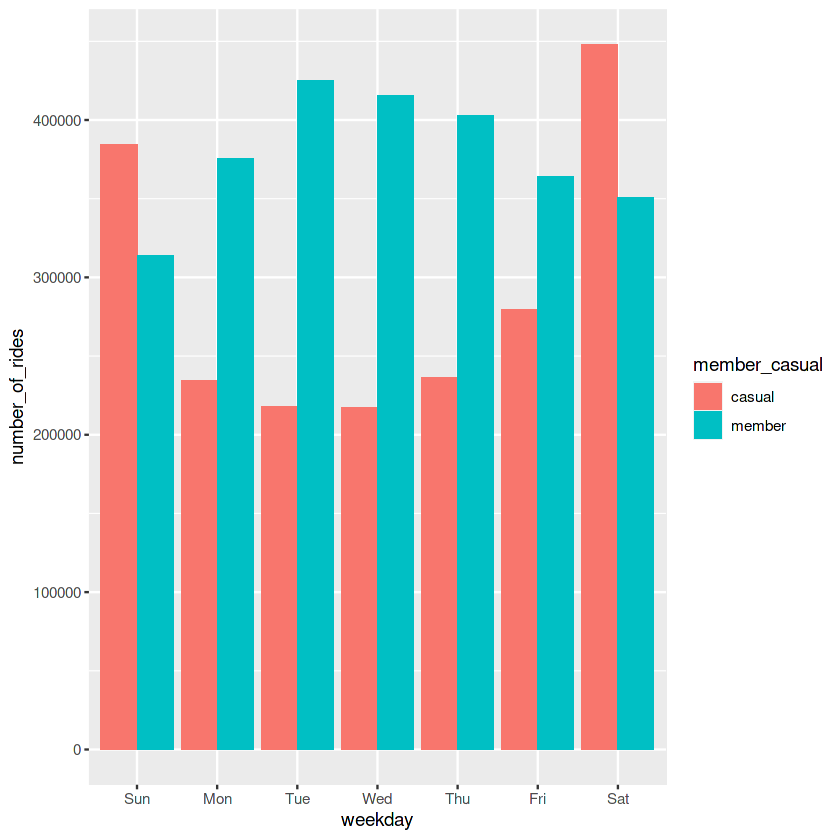

In [21]:
options(scipen = 999)
clean_data %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

From both the summary table and the chart, Casuals ride more during the weekends whereas members ride more in the weekdays.

### Create a visualization for average duration

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


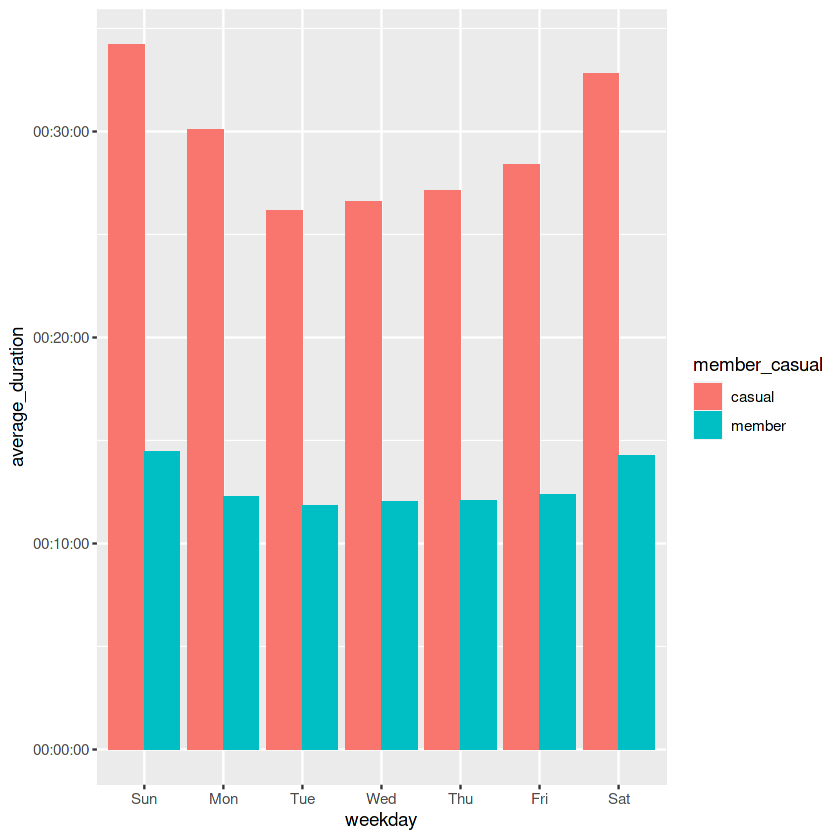

In [22]:
clean_data %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+
  scale_y_time()

The average ride duration of members is below 15 mins throughout the week. However, that of casuals is above 30 minutes on weekends and even over 25 minutes on the weekdays where they ride fewer trips than the members.

### Visualize number of rides in related to months of the year

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


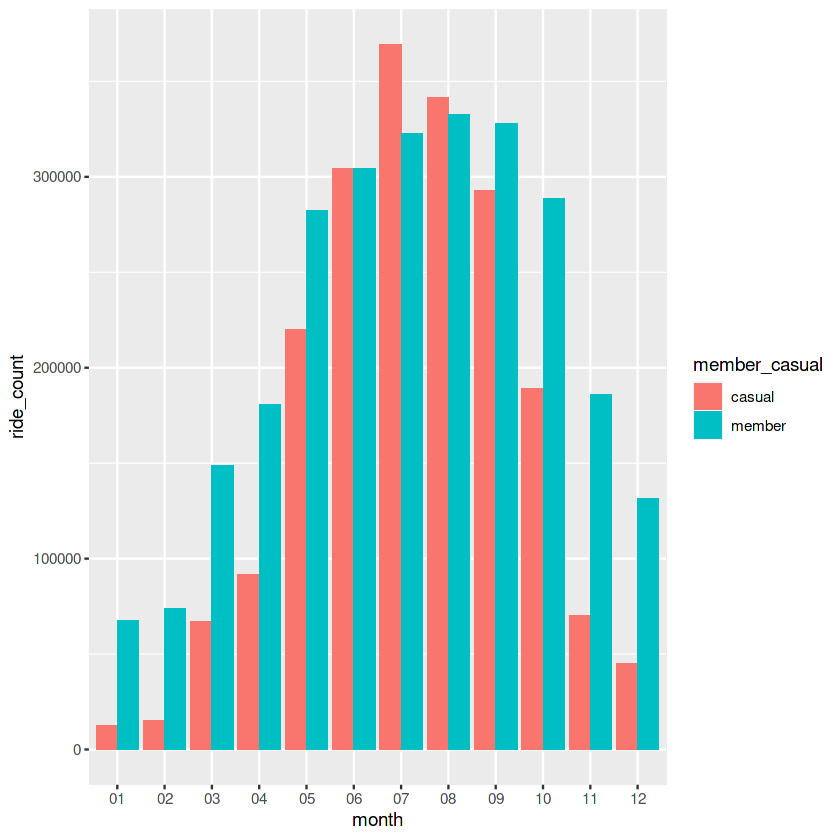

In [23]:
clean_data %>% 
  group_by(member_casual,month) %>% 
  summarize(ride_count = n()) %>% 
  ggplot(aes(x=month,y=ride_count,fill=member_casual))+
  geom_col(position = "dodge")

Most of the rides took place between May and October. The peak month for casuals is July and that of members is August. There are very few casual rides in January and February. Member rides also decrease but not as low as that of casuals.

### Creat a line chart showing relation of number of rides and start time of the rides between casuals and members

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


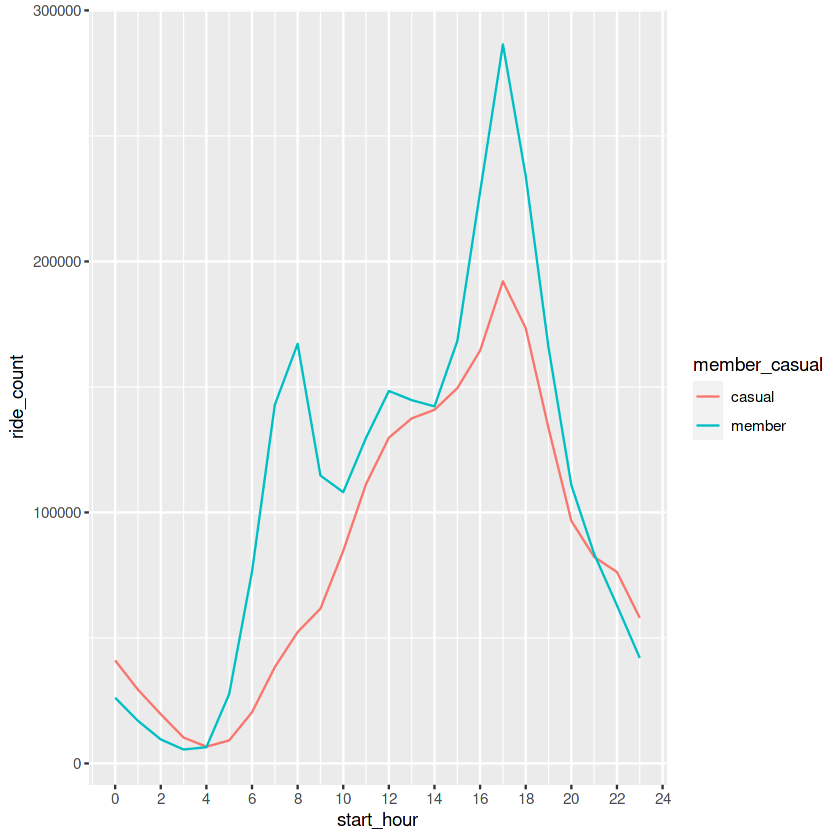

In [24]:
clean_data %>% 
  group_by(member_casual,start_hour=hour(started_at)) %>% 
  summarize(ride_count = n()) %>% 
  ggplot(aes(x=start_hour, y = ride_count,color=member_casual))+
  geom_line()+
  scale_x_continuous(breaks=seq(0,24,2))

Member rides have a peak at around 17:00. Casuals have two peaks in the day, one around 8:00 and the other at 17:00 while the afternoon peak is higher than members.



### Creat a visualization of number of ride counts related to time of the day on weekends.

`summarise()` has grouped output by 'member_casual', 'day_of_week'. You can
override using the `.groups` argument.


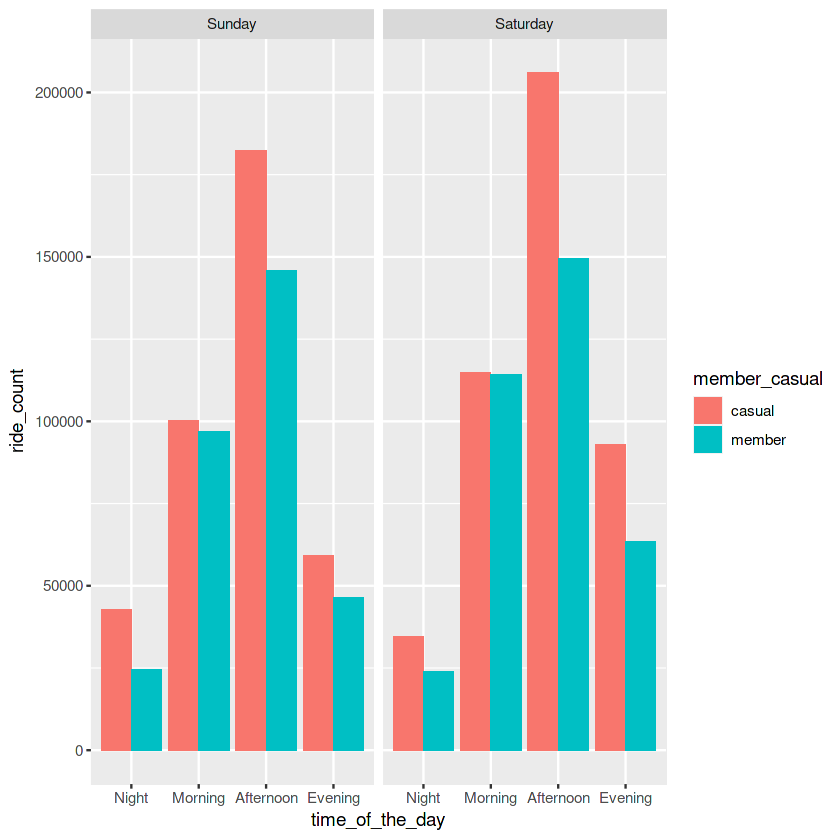

In [25]:
clean_data %>%
  filter(day_of_week=="Sunday" |day_of_week=="Saturday") %>% 
  group_by(member_casual,day_of_week,time_of_the_day =time_period) %>% 
  summarise(average_ride_length=mean(ride_length),ride_count=n()) %>% 
  ggplot(aes(x=time_of_the_day, y=ride_count,fill=member_casual))+
  geom_col(position="dodge")+
  facet_wrap(~day_of_week)

Both members and casuals ride most in the afternoon time which is also in consistent with the peak hour in the previous chart. 

### Visualize the average ride length in relation to time of the day

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


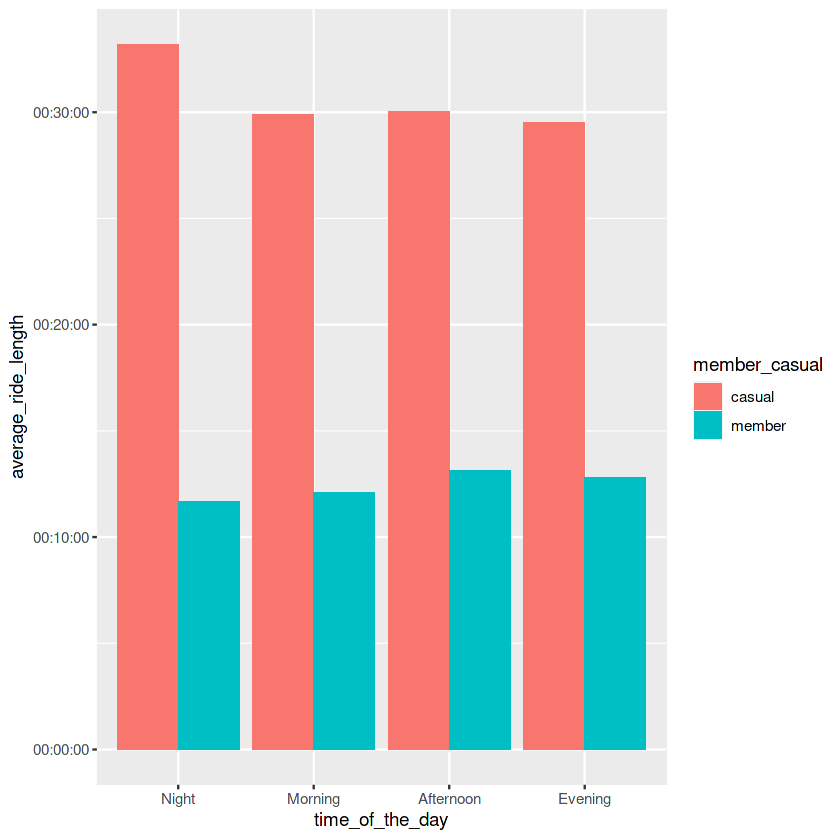

In [26]:
clean_data %>% 
  group_by(member_casual,time_of_the_day =time_period) %>% 
  summarise(average_ride_length=mean(ride_length)) %>% 
  ggplot(aes(x=time_of_the_day, y=average_ride_length,fill=member_casual))+
  geom_col(position="dodge")+
  scale_y_time()

The average ride length of both casuals and members seem little variations with time of the day.

## <div id = "share"> ***Share*** 
### A summary of ride counts and average ride time between members and casuals on different days of week

In [27]:
{echo=FALSE}
{message = FALSE}
summary<-clean_data %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(),average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday) 
  knitr::kable(summary,caption = "Summary of Ride counts and Average Ride Time on Diferent Days of Week")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.




Table: Summary of Ride counts and Average Ride Time on Diferent Days of Week

|member_casual |weekday | number_of_rides| average_duration|
|:-------------|:-------|---------------:|----------------:|
|casual        |Sun     |          384620|        2053.6915|
|casual        |Mon     |          234503|        1806.2886|
|casual        |Tue     |          218154|        1569.9493|
|casual        |Wed     |          217437|        1597.2237|
|casual        |Thu     |          236564|        1628.6583|
|casual        |Fri     |          279855|        1702.6996|
|casual        |Sat     |          448055|        1967.9969|
|member        |Sun     |          314111|         867.0642|
|member        |Mon     |          375444|         736.5971|
|member        |Tue     |          424916|         711.8568|
|member        |Wed     |          415263|         721.8129|
|member        |Thu     |          403068|         724.4462|
|member        |Fri     |          364201|         741.9006|
|memb

From analysis, the different patterns between members and casuals are as follows.

### Ride counts in various month of the year

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


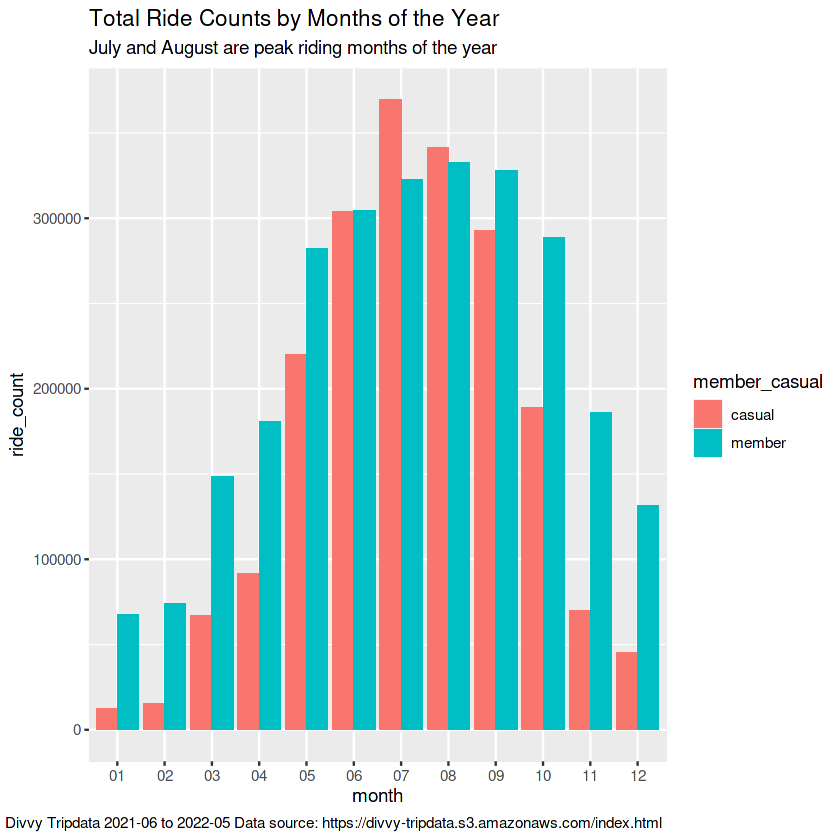

In [28]:
{echo=FALSE}
clean_data %>% 
  group_by(member_casual,month) %>% 
  summarize(ride_count = n()) %>% 
  ggplot(aes(x=month,y=ride_count,fill=member_casual))+
  geom_col(position = "dodge")+
  labs(title="Total Ride Counts by Months of the Year",
       subtitle="July and August are peak riding months of the year",
       caption="Divvy Tripdata 2021-06 to 2022-05 Data source: https://divvy-tripdata.s3.amazonaws.com/index.html ")

Most of the rides occur in May to October. Peak months for members and casuals are August and  July respectively. Both categories of rides are lowest in cold months, January and February.

### Average ride duration

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


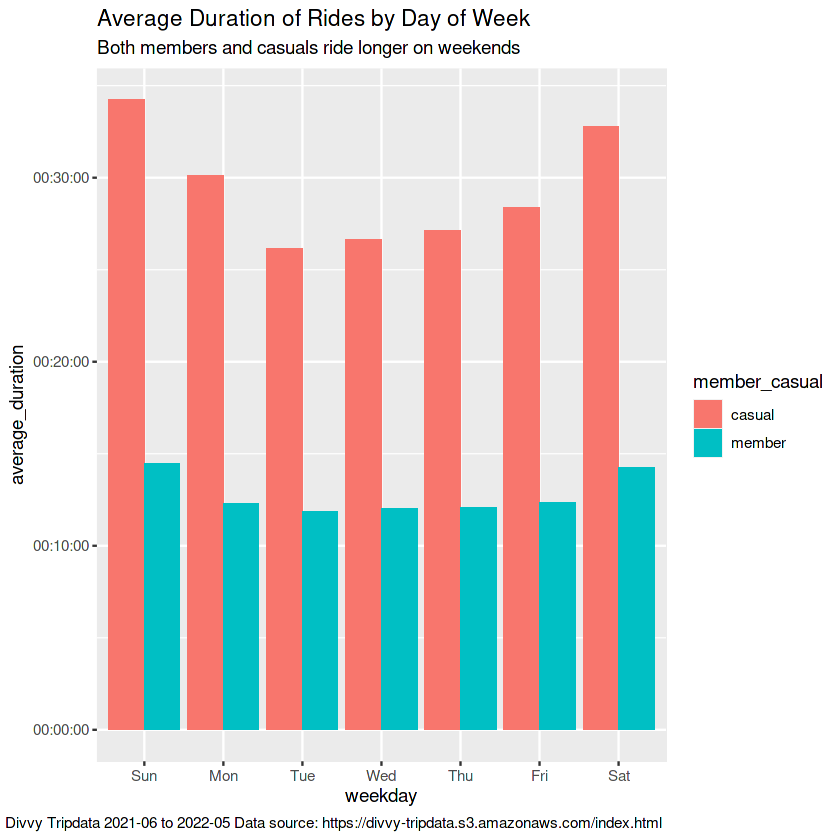

In [29]:
{echo=FALSE}
clean_data %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+
  scale_y_time()+
  labs(title = "Average Duration of Rides by Day of Week",
       subtitle = "Both members and casuals ride longer on weekends",
       caption="Divvy Tripdata 2021-06 to 2022-05 Data source: https://divvy-tripdata.s3.amazonaws.com/index.html ")

The average ride duration of casuals is obviously longer than that of members. Member rides are below 15 minutes throughout the week whereas causual rides are over 25 minutes on weekdays and even higher than 30 minutes on weekends.

### Ride counts by day of week

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


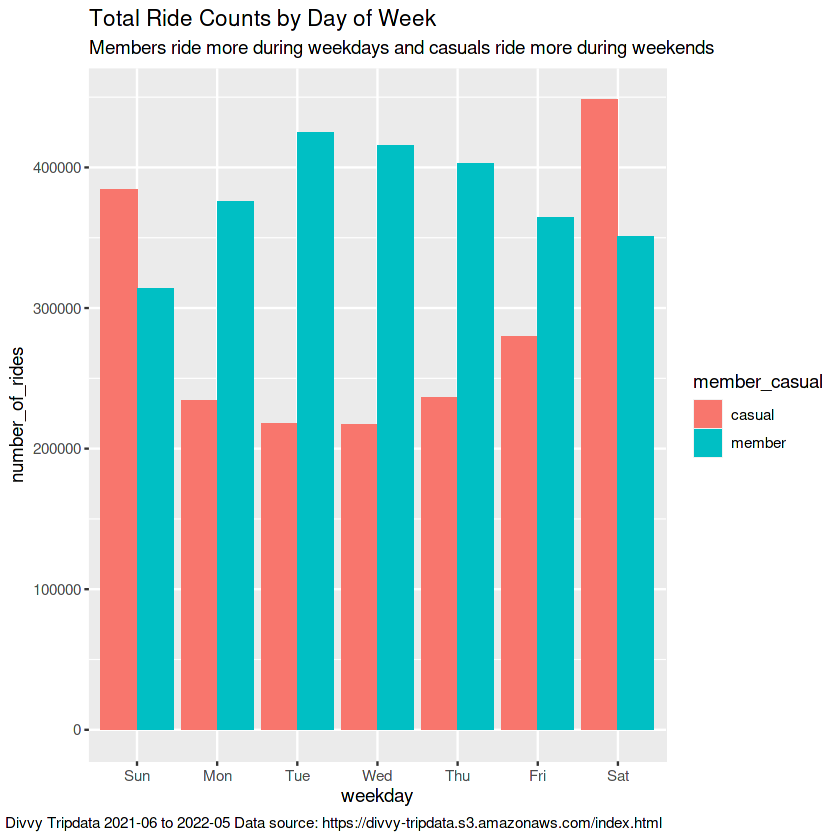

In [30]:
{echo=FALSE}
clean_data %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title = "Total Ride Counts by Day of Week",
       subtitle = "Members ride more during weekdays and casuals ride more during weekends",
       caption="Divvy Tripdata 2021-06 to 2022-05 Data source: https://divvy-tripdata.s3.amazonaws.com/index.html ")

Total ride counts of casuals are peaked during weekends while member ride counts are more on weekdays. 

### Ride counts by start hour

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


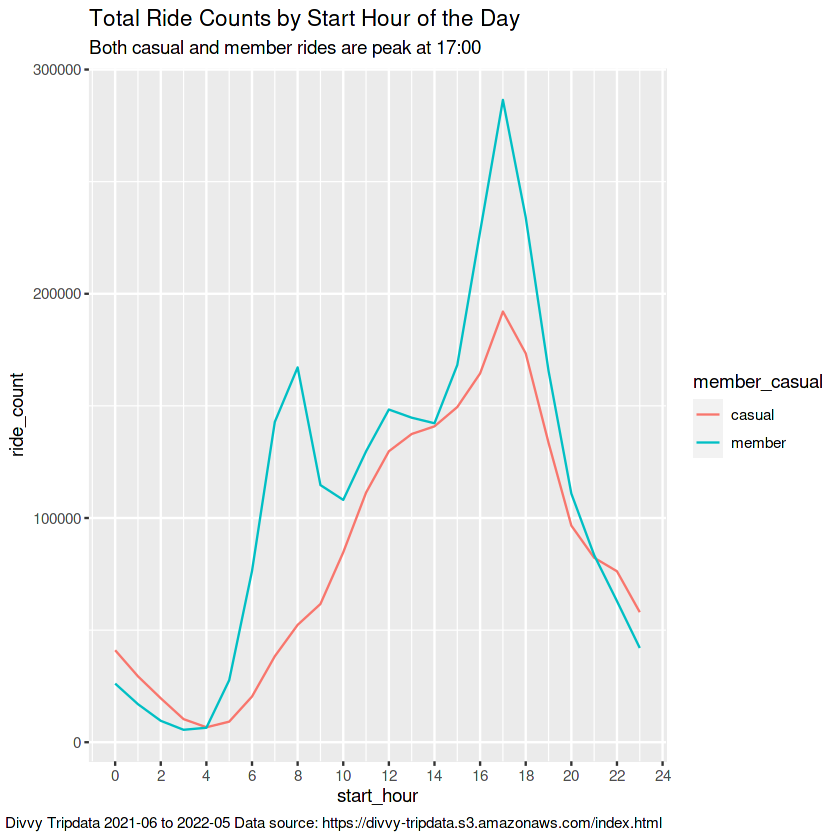

In [31]:
{ echo = FALSE}
clean_data %>% 
  group_by(member_casual,start_hour=hour(started_at)) %>% 
  summarize(ride_count = n()) %>% 
  ggplot(aes(x=start_hour, y = ride_count,color=member_casual))+
  geom_line()+
  scale_x_continuous(breaks=seq(0,24,2))+
  labs(title = "Total Ride Counts by Start Hour of the Day",
       subtitle = "Both casual and member rides are peak at 17:00",
       caption="Divvy Tripdata 2021-06 to 2022-05 Data source: https://divvy-tripdata.s3.amazonaws.com/index.html ")

Member rides have a peak at around 17:00. Casuals have two peaks in the day, one around 8:00 and the other at 17:00 while the afternoon peak is higher than members. Members highest ride count by start hour of the day is below 200,000 while that of casuals is nearly 300,000.

### Average ride time by time of the day

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


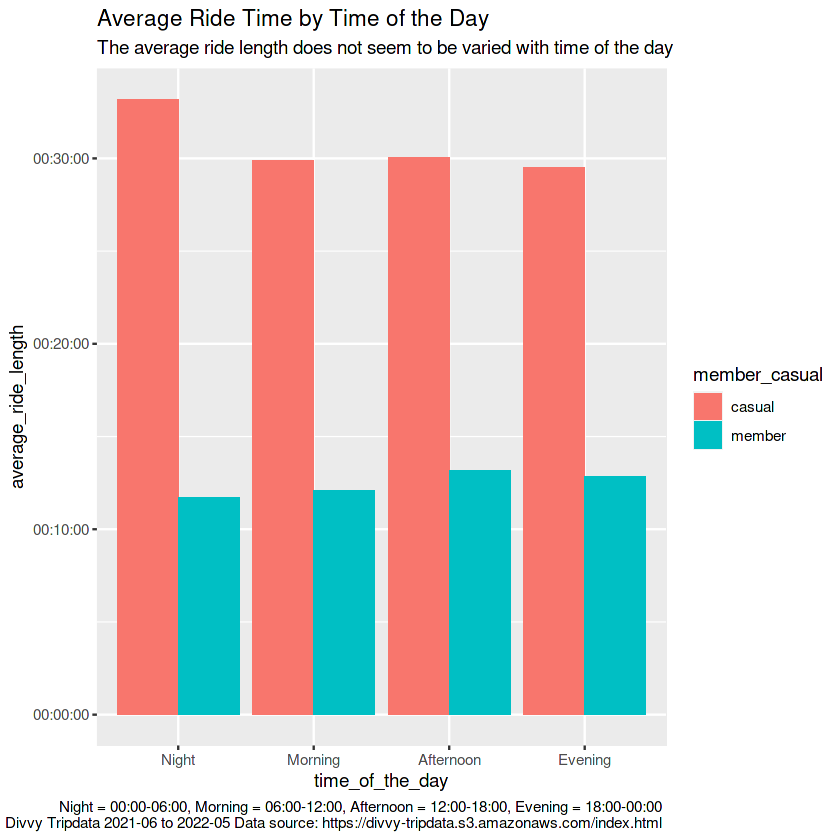

In [32]:
{echo=FALSE}
clean_data %>% 
  group_by(member_casual,time_of_the_day =time_period) %>% 
  summarise(average_ride_length=mean(ride_length)) %>% 
  ggplot(aes(x=time_of_the_day, y=average_ride_length,fill=member_casual))+
  geom_col(position="dodge")+
  scale_y_time()+
  labs(title = "Average Ride Time by Time of the Day",
       subtitle = "The average ride length does not seem to be varied with time of the day",
       caption="Night = 00:00-06:00, Morning = 06:00-12:00, Afternoon = 12:00-18:00, Evening = 18:00-00:00 
       Divvy Tripdata 2021-06 to 2022-05 Data source: https://divvy-tripdata.s3.amazonaws.com/index.html ")

The average ride length of both casuals and members seem little variations with time of the day.

### Number of rides by time of the day on weekends

`summarise()` has grouped output by 'member_casual', 'day_of_week'. You can
override using the `.groups` argument.


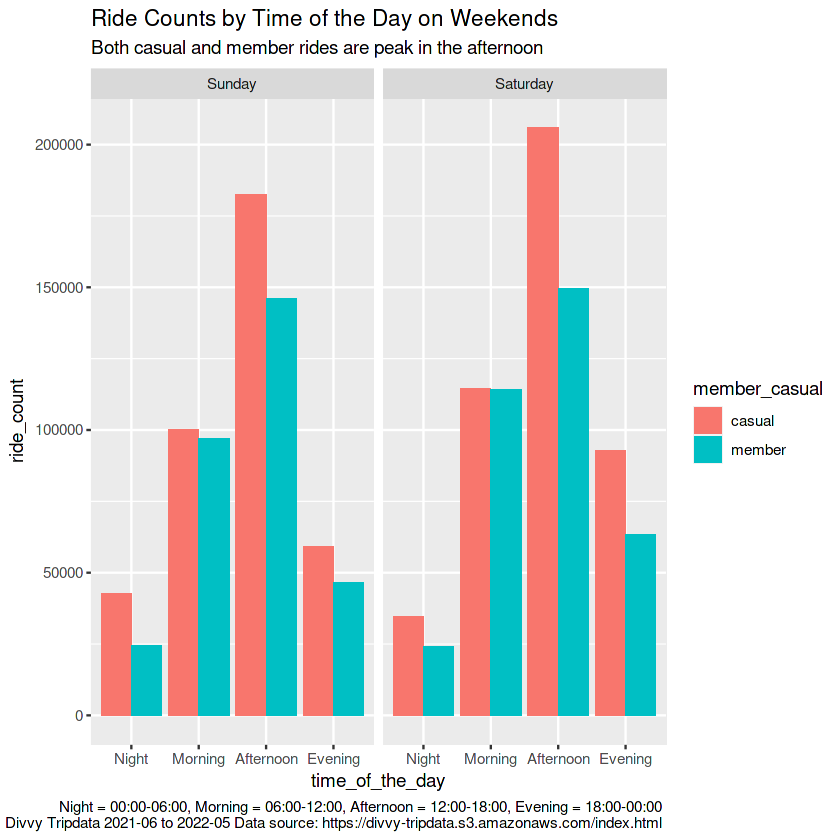

In [33]:
{echo=FALSE}
clean_data %>%
  filter(day_of_week=="Sunday" |day_of_week=="Saturday") %>% 
  group_by(member_casual,day_of_week,time_of_the_day =time_period) %>% 
  summarise(average_ride_length=mean(ride_length),ride_count=n()) %>% 
  ggplot(aes(x=time_of_the_day, y=ride_count,fill=member_casual))+
  geom_col(position="dodge")+
  facet_wrap(~day_of_week)+
  labs(title = "Ride Counts by Time of the Day on Weekends",
       subtitle = "Both casual and member rides are peak in the afternoon",
       caption="Night = 00:00-06:00, Morning = 06:00-12:00, Afternoon = 12:00-18:00, Evening = 18:00-00:00 
       Divvy Tripdata 2021-06 to 2022-05 Data source: https://divvy-tripdata.s3.amazonaws.com/index.html ")

##  ***Act***

### Conclusion of Analysis and Recommendation

The main differences in trends of member and casual rides are peak days of the week and the average ride time.  
    Casuals ride more on the weekends and members ride more on the weekdays.
Casuals have a average ride length of 25-35 minutes while members only have below 15 minutes.  
**Recommendation:** Marketing strategies and pricing should focus on weekends to attract more casuals. Setting different perks for various ride length especiall(25-35 minutes) might also be a good direction.
    
Another trends is the peak hours of the day of ride counts.  
Both members and casuals ride more in the afternoon around 17:00.  
**Recommendation:** Focusing on this time period may also increase the membership subscription.
    
The other trends worth noticed is the peak rides in May to October of the year.  
**Recommendation:** This should be inspected more for the coming year. If this trend persists, campaign on these months of the year might not only retains the original members but also attract new members.  

### Additional and Further Analysis

We can investigate and analyze the reason for casual riders to buy annual memberships.  
We can also study the impact of social media in influencing casual rides to become more interested in annual memberships.  